In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

In [3]:
df = pd.read_csv("stochastic_results_2.csv")

In [15]:
df['val_of_deterministic_soln'] = df['opt_val'] - df['VSS']

In [5]:
df['rel_VSS'] = df['VSS']/(df['opt_val']+df['VSS'])
# rel_VSS is the additional value of the stochastic solution as a proportion of
# the DETERMINISTIC solution, i.e. stochastic solution is 100*(rel_VSS)% better.

In [10]:
D = 40 # dataset
N = 100 # nb_scenarios
G = 0.05 # gap

dataset_selector = df['dataset'] == D
nb_scenarios_selector = df['nb_scenarios'] == N
gap_selector = df['miprelstop_setting'] == G

# P = 0.1 # dropout probability
P_list = [0.050, 0.075, 0.100]




In [34]:
selected_deterministic_value = []
selected_VSS_data = []
selected_time_taken = []
for P in P_list:
    P_selector = df['P_dropout_pairs'] == P
    selected_df = df[dataset_selector & nb_scenarios_selector & P_selector & gap_selector]
    selected_deterministic_value.append(selected_df['val_of_deterministic_soln'])
    selected_VSS_data.append(selected_df['rel_VSS'])
    selected_time_taken.append(selected_df['time'])

In [39]:
for i in range(len(selected_deterministic_value)):
    mean = selected_deterministic_value[i].mean()
    std = selected_deterministic_value[i].std()
    lower = mean - 1.96*std
    upper = mean + 1.96*std

    print(f"Mean: {mean}")
    print(f"CI: [{lower},{upper}]")
    print(f"Uncertainty: {(upper-mean)/mean}")
    print("")

Mean: 933.0630000000037
CI: [839.8818606024081,1026.2441393975994]
Uncertainty: 0.09986586050201891

Mean: 782.7086666666694
CI: [671.1904746309278,894.2268587024109]
Uncertainty: 0.1424772674495421

Mean: 662.6280000000061
CI: [583.1006239209242,742.1553760790879]
Uncertainty: 0.12001813397423756



In [ ]:
# DONE: Create a confidence interval for each of the DETERMINISTIC solutions' values.
# TODO: Measure the time taken for the STOCHASTIC model to run.
# ^ Could do this with different numbers of nodes...

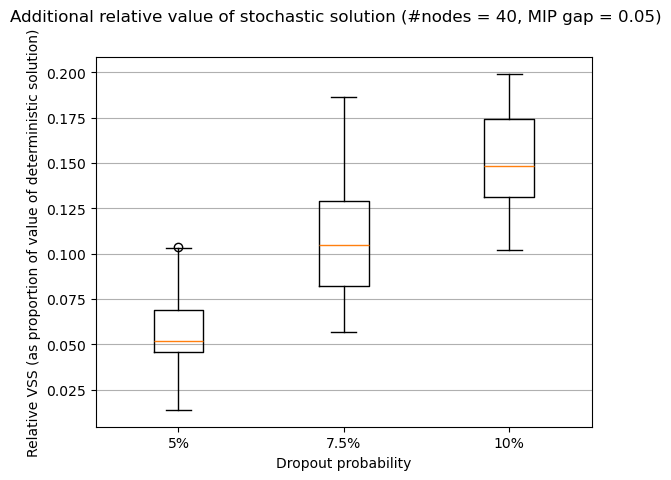

In [28]:
fig, ax = plt.subplots()

ax.boxplot(selected_VSS_data)

fig.suptitle(f'Additional relative value of stochastic solution (#nodes = {D}, MIP gap = {G})')
ax.set_xlabel('Dropout probability')
ax.set_ylabel('Relative VSS (as proportion of value of deterministic solution)')

ax.yaxis.grid(True)
ax.set_xticks([1,2,3], labels=['5%','7.5%','10%'])

plt.show()

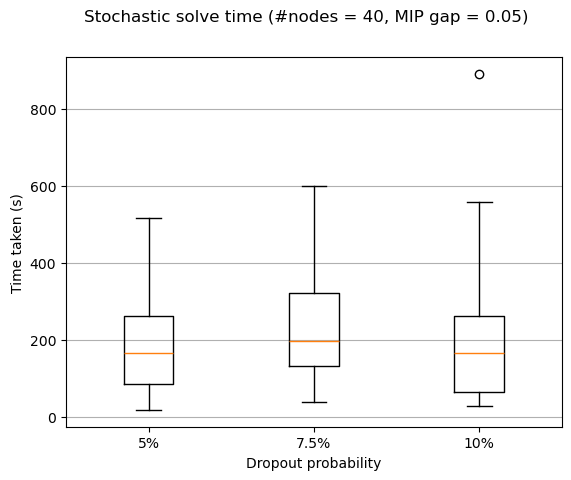

In [25]:
fig, ax = plt.subplots()

ax.boxplot(selected_time_taken)

fig.suptitle(f'Stochastic solve time (#nodes = {D}, MIP gap = {G})')
ax.set_xlabel('Dropout probability')
ax.set_ylabel('Time taken (s)')

ax.yaxis.grid(True)
ax.set_xticks([1,2,3], labels=['5%','7.5%','10%'])

plt.show()

In [26]:
selected_time_taken

[[388.1420090198517,
  207.9792628288269,
  83.3264389038086,
  74.08534669876099,
  235.94370889663696,
  18.218897581100464,
  52.93201303482056,
  242.2371859550476,
  515.3008182048798,
  457.01304602622986,
  237.5338099002838,
  160.62858819961548,
  104.27803587913512,
  67.16534399986267,
  324.3888320922852,
  89.03756260871887,
  222.88633394241333,
  132.46690559387207,
  52.907296657562256,
  172.5340232849121,
  83.21527314186096,
  137.27722311019895,
  269.99089455604553,
  377.96931982040405,
  97.13597369194032,
  348.81640577316284,
  62.82054018974304,
  187.0041697025299,
  463.4833586215973,
  94.44796442985536],
 [76.69761753082275,
  135.76273822784424,
  204.62341237068176,
  109.102112531662,
  327.63083934783936,
  115.7337839603424,
  162.08979654312134,
  393.9489495754242,
  145.25883078575134,
  130.05397129058838,
  190.35758185386652,
  305.9392349720001,
  209.75842189788816,
  176.82554054260254,
  290.5227394104004,
  46.64112997055054,
  104.44648981